In [1]:
import os

import numpy as np
# import FT as FT


import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'
#-------------------------#

In [2]:
#load the module

from os import  getcwd, chdir

curDir=getcwd()#this is the directory of the notebook
chdir('../../src')#go to the direcory that interfacePy is located
from interfacePy.FT import FT #easy tick formatting
chdir(curDir)#return to the directory of the notebook

In [3]:
DormandPrince=np.loadtxt('DormandPrince.dat')
RODASPR2=np.loadtxt('RODASPR2.dat')
ROS34PW2=np.loadtxt('ROS34PW2.dat')



<IPython.core.display.Javascript object>


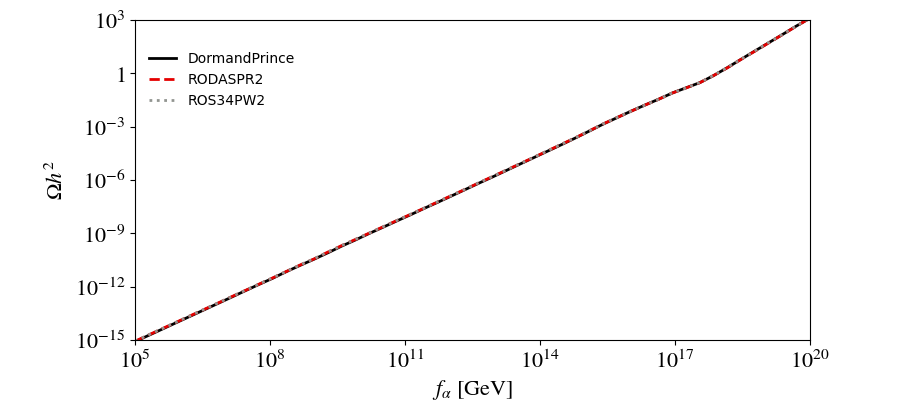

In [4]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    sub = fig.add_subplot(1,1,1)
    
    
    _ch=DormandPrince[:,0]==DormandPrince[0,0]    
    
    sub.plot(DormandPrince[_ch][:,1],DormandPrince[_ch][:,4],linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r"DormandPrince")
    sub.plot(RODASPR2[_ch][:,1],RODASPR2[_ch][:,4],linestyle='--',linewidth=2,alpha=1,c='xkcd:red',label=r"RODASPR2")
    sub.plot(ROS34PW2[_ch][:,1],ROS34PW2[_ch][:,4],linestyle=':',linewidth=2,alpha=1,c='xkcd:gray',label=r"ROS34PW2")
    
    
    sub.set_xlabel(r'$f_\alpha ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.12) 
    sub.set_ylabel(r'$ \Omega h^2 $')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    sub.legend(bbox_to_anchor=(0.02, 0.9),borderaxespad=0., 
           borderpad=0,ncol=1,loc='upper left',fontsize=10,framealpha=0)

    #set major ticks
    _M_xticks=[ 10.**i for i in range(5,21,3) ]
    _M_yticks=[ 10.**i for i in range(-15,4,3) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=1e5,xmax=1e20,ymin=1e-15,ymax=1e3,xscale='log',yscale='log')

    ft.format_ticks(plt,sub)    

    fig.show()

<IPython.core.display.Javascript object>


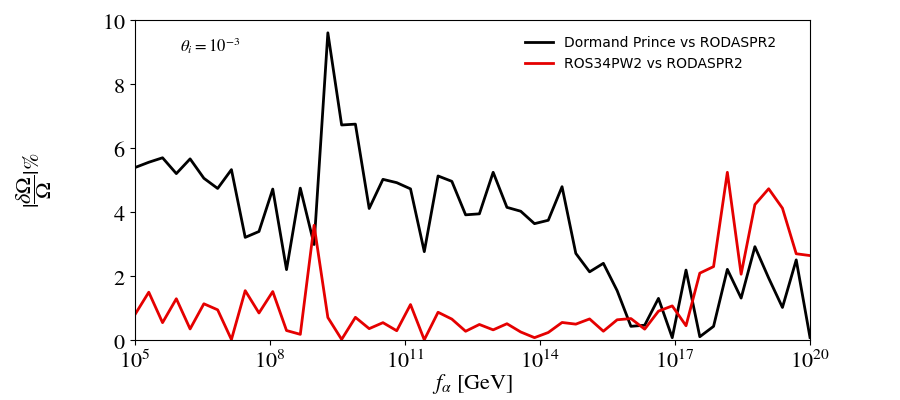

In [5]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    sub = fig.add_subplot(1,1,1)
    
#     _ch=DormandPrince[:,0]==DormandPrince[-1,0] #theta_i = pi
#     sub.text(1e6,9, r'$\theta_i = \pi$', fontsize=12)    

    _ch=DormandPrince[:,0]==DormandPrince[0,0] #theta_i = 1e-3
    sub.text(1e6,9, r'$\theta_i = 10^{-3}$', fontsize=12)    
    
    Y=np.abs((DormandPrince[:,4]-RODASPR2[:,4])/RODASPR2[:,4])*100.
    sub.plot(DormandPrince[:,1][_ch],Y[_ch],linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r"Dormand Prince vs RODASPR2")
#     sub.scatter(DormandPrince[:,1],Y,marker='o',s=5,alpha=1,facecolor='xkcd:black',edgecolor='xkcd:black',label=r"Dormand Prince vs RODASPR2")
    
    Y=np.abs((ROS34PW2[:,4]-RODASPR2[:,4])/RODASPR2[:,4])*100.
    sub.plot(ROS34PW2[:,1][_ch],Y[_ch],linestyle='-',linewidth=2,alpha=1,c='xkcd:red',label=r"ROS34PW2 vs RODASPR2")
#     sub.scatter(ROS34PW2[:,1],Y,marker='o',s=5,alpha=0.5,facecolor='xkcd:white',edgecolor='xkcd:red',label=r"ROS34PW2 vs RODASPR2")
    
    
    sub.set_xlabel(r'$f_\alpha ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\left| \dfrac{\delta \Omega}{\Omega} \right| \%$')
    sub.yaxis.set_label_coords(-0.12,0.5) 
    
    sub.legend(bbox_to_anchor=(0.95, 0.95),borderaxespad=0., 
           borderpad=0,ncol=1,loc='upper right',fontsize=10,framealpha=0)

    #set major ticks
    _M_xticks=[ 10.**i for i in range(5,21,3) ]
    _M_yticks=[ i for i in range(0,11,2) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=1e5,xmax=1e20,ymin=0,ymax=1e1,xscale='log',yscale='linear')

    ft.format_ticks(plt,sub)    

    fig.savefig('Solvers_rel_diffs.pdf',bbox_inches='tight')

    fig.show()